## Exercises I - Required

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import acquire

### Acquire

In [3]:
df = acquire.get_telco_data()

In [4]:
df.shape

(7043, 24)

In [5]:
# drop any duplicates
df.drop_duplicates(inplace=True)
    
    # fill any empty spaces with np.nan
df.replace(' ', np.nan, inplace=True)
    
    # drop rows that contain null values, they are a small percentage
df.dropna(axis=0, inplace=True)
    
    # convert total_charges to a numeric data type
df = df.astype({'total_charges': 'float64'})

    # No computations will be done on 'customer_id' that column will become the index.
df.set_index('customer_id', drop=True, inplace=True)

In [6]:
df.head(5)

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
customer_id,,,,,,,,,,,,,,,,,,,,,
2794-XIMMO,1,1,2,Male,0,Yes,No,53,No,No phone service,...,Yes,Yes,Yes,Yes,60.45,3184.25,Yes,One year,Electronic check,DSL
2851-STERV,1,1,2,Male,1,No,No,35,Yes,No,...,Yes,Yes,Yes,Yes,73.00,2471.25,No,One year,Electronic check,DSL
2898-LSJGD,1,1,2,Female,0,Yes,Yes,21,No,No phone service,...,No,Yes,Yes,Yes,55.95,1157.05,Yes,One year,Electronic check,DSL
2969-WGHQO,1,1,2,Female,0,Yes,Yes,7,Yes,No,...,No,Yes,No,No,69.45,477.05,No,One year,Electronic check,DSL
2988-PLAHS,1,1,2,Female,0,No,No,3,Yes,No,...,No,Yes,Yes,Yes,69.95,220.45,No,One year,Electronic check,DSL


In [10]:
df.tenure_years.value_counts()

0    2058
5    1121
1    1047
2     876
4     820
3     748
6     362
Name: tenure_years, dtype: int64

In [11]:
# Validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 2794-XIMMO to 9764-REAFF
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7032 non-null   int64  
 1   payment_type_id           7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [12]:
# Split into train, validate, and test sets.

train, validate, test = wrangle.split_continuous(df)

NameError: name 'wrangle' is not defined

In [15]:
telco_cols = ['monthly_charges', 'tenure', 'total_charges']
descriptive = {'monthly_charges': 'Monthly Charges ($)',
               'tenure': 'Tenure (months)',
               'total_charges': 'Total Charges ($)',
               'tenure_years': 'Tenure (years)',
              '':''}

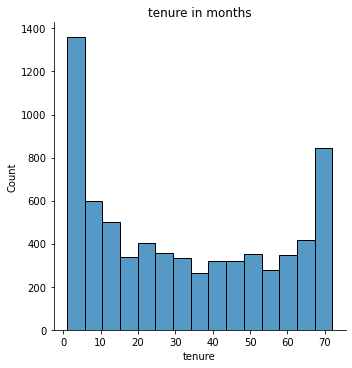

In [14]:
sns.displot(x = 'tenure', data=df)
plt.title('tenure in months')
plt.show()

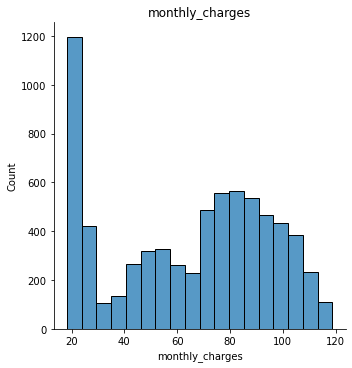

In [16]:
sns.displot(x = 'monthly_charges', data=df)
plt.title('monthly_charges')
plt.show()

### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
def plot_variable_pairs(train, cols, descriptive=None, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line. If passed a descriptive
    dictionary, converts axis titles to the corresponding names.
    '''
    # sets line-plot options and scatter-plot options
    keyword_arguments={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}
    
    # creates pairplot object
    pairplot = sns.pairplot(train[cols], hue=hue, kind="reg",\
            plot_kws=keyword_arguments)
    
    # if passed a descriptive dictionary, iterates through matplotlib axes
    # in our pairplot object and sets their axis labels to the corresponding 
    # strings.
    if descriptive:
        for ax in pairplot.axes.flat:
            ax.set_xlabel(descriptive[ax.get_xlabel()])
            ax.set_ylabel(descriptive[ax.get_ylabel()])
    
    # Adds a super-title
    pairplot.fig.suptitle('Correlation of Continuous Variables', y=1.08)
    plt.show()

In [17]:
pairplot = sns.pairplot(train[telco_cols])
pairplot

NameError: name 'train' is not defined

In [18]:
for i in pairplot.axes.flat:
    print(i)

NameError: name 'pairplot' is not defined

In [19]:
plot_variable_pairs(train, telco_cols, descriptive)

NameError: name 'plot_variable_pairs' is not defined

In [20]:
def plot_pairplot(train, cols, descriptive=None, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    pairplot = sns.pairplot(train[cols], corner=True)
    pairplot.axes.flat[0].set_ylabel(cols[0])
    if descriptive:
        for ax in pairplot.axes.flat:
            if ax:
                ax.set_xlabel(descriptive[ax.get_xlabel()])
                ax.set_ylabel(descriptive[ax.get_ylabel()])
    pairplot.fig.suptitle('Correlation of Continuous Variables', y=1.08)
    plt.show()

In [21]:
plot_pairplot(train, telco_cols, descriptive=descriptive)

NameError: name 'train' is not defined

### Heatmap

In [ ]:
train[telco_cols].corr()

In [ ]:
def create_heatmap(train, cols, descriptive=None):
    corr_matrix = train[cols].corr()
    
    kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
    labels = pd.Series(cols)
    if descriptive:
        labels = labels.map(descriptive)
    plt.figure(figsize=(8,6))
    heatmap = sns.heatmap(corr_matrix, cmap='Purples', annot=True, \
                          xticklabels=labels, yticklabels=labels, **kwargs)
    plt.ylim(0, 3)
    plt.title('Correlation of Continuous Variables')
    plt.show()

In [ ]:
create_heatmap(train, telco_cols, descriptive)

### Convert Data Types

In [ ]:
train['tenure_years'] = train.tenure_years.astype('object')
validate['tenure_years'] = validate.tenure_years.astype('object')
test['tenure_years'] = test.tenure_years.astype('object')

In [ ]:
train.info()

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.


In [8]:
def months_to_years(df):
    """
    Takes in the telco df and returns the df with new 
    categorical feature 'tenure_years'
    """
    df['tenure_years'] = round(df.tenure // 12)
    df['tenure_years'] = df.tenure_years.astype('object')
    return df

In [9]:
df = months_to_years(df)
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years
customer_id,,,,,,,,,,,,,,,,,,,,,
2794-XIMMO,1,1,2,Male,0,Yes,No,53,No,No phone service,...,Yes,Yes,Yes,60.45,3184.25,Yes,One year,Electronic check,DSL,4
2851-STERV,1,1,2,Male,1,No,No,35,Yes,No,...,Yes,Yes,Yes,73.00,2471.25,No,One year,Electronic check,DSL,2
2898-LSJGD,1,1,2,Female,0,Yes,Yes,21,No,No phone service,...,Yes,Yes,Yes,55.95,1157.05,Yes,One year,Electronic check,DSL,1
2969-WGHQO,1,1,2,Female,0,Yes,Yes,7,Yes,No,...,Yes,No,No,69.45,477.05,No,One year,Electronic check,DSL,0
2988-PLAHS,1,1,2,Female,0,No,No,3,Yes,No,...,Yes,Yes,Yes,69.95,220.45,No,One year,Electronic check,DSL,0


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- For Example: tenure_years with total_charges.
- For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [22]:
def plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, df, descriptive=None):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    for categorical_var in categorical_vars:
        for continuous_var in continuous_vars:
            categorical_label = categorical_var
            continuous_label = continuous_var

            if descriptive:
                categorical_label = descriptive[categorical_var]
                continuous_label = descriptive[continuous_var]
                
            fig, axes = plt.subplots(figsize=(12,36), nrows=4,ncols=1)
            fig.suptitle(f'{continuous_label} by {categorical_label}', fontsize=18, y=1.02)

            sns.lineplot(ax=axes[0], x=categorical_var, y=continuous_var, data=df)
            axes[0].set_title('Line Plot', fontsize=14)
            axes[0].set_xlabel(categorical_label, fontsize=12)
            axes[0].set_ylabel(continuous_label, fontsize=12)
            
            sns.boxplot(ax=axes[1], x=categorical_var, y=continuous_var, data=df,\
                        color='blue')
            axes[1].set_title('Box-and-Whiskers Plot', fontsize=14)
            axes[1].set_xlabel(categorical_label, fontsize=12)
            axes[1].set_ylabel(continuous_label, fontsize=12)
            
            sns.swarmplot(ax=axes[2], x=categorical_var, y=continuous_var, data=df,\
                        palette='Blues')
            axes[2].set_title('Swarm Plot', fontsize=14)
            axes[2].set_xlabel(categorical_label, fontsize=12)
            axes[2].set_ylabel(continuous_label, fontsize=12)
            
            sns.barplot(ax=axes[3], x=categorical_var, y=continuous_var, data=df,\
                        palette='Purples')
            axes[3].set_title('Bar Plot', fontsize=14)
            axes[3].set_xlabel(categorical_label, fontsize=12)
            axes[3].set_ylabel(continuous_label, fontsize=12)
            
            plt.tight_layout()

            plt.show()

In [23]:
plot_categorical_and_continuous_vars(['tenure_years'], \
                    train.drop(columns=['customer_id', 'tenure_years', 'tenure']).columns,\
                    train, descriptive)

NameError: name 'train' is not defined

### Object Oriented Approach, subplots method
- figure is the container holding our plots
- axes are the actual plots
- so our plot can contain more than one axis

In [24]:
def plot_categorical_and_continuous_vars_telco(df, descriptive=None):  
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,10), nrows=3,ncols=1, sharex=True)
    plt.style.use('seaborn-bright')

    plt.suptitle('Total Charges by Tenure Years', fontsize=18)

    ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
    ax1.set_ylabel('US Dollars', fontsize=14)

    ax2.bar(df.tenure_years, df.total_charges, color='dodgerblue')
    ax2.set_ylabel('US Dollars', fontsize=14)

    ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
    ax3.set_xlabel('Tenure in Years', fontsize=14)
    ax3.set_ylabel('US Dollars', fontsize=14)

    plt.tight_layout()
    plt.show()

In [ ]:
plot_categorical_and_continuous_vars_telco(df, descriptive)

### How about some pie?

In [25]:
def telco_pie(train):
    plt.style.use('seaborn-paper')
    labels = ['0 years', '1 years', '2 years', '3 years', '4 years', '5 years', '6 years']
    colors = ['dodgerblue', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke']
    explode = (0.1, 0, 0, 0, 0, 0, 0) 
    
    plt.pie(train.tenure_years.value_counts(), explode=explode, colors=colors,\
            labels = labels, autopct='%1.0f%%', shadow=True, textprops={'fontsize':14},\
            wedgeprops={'edgecolor': 'black', 'width': 0.6})
    plt.title('Percent of Accounts by Tenure Years', fontsize=18)
    plt.show()

In [ ]:
telco_pie(train)

### Correlation Function 

In [26]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

In [ ]:
correlation_exploration(train, 'tenure', 'total_charges')

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.